#CAPSTONE PROJECT

##Web and Social Media Analytics

**Business Understanding**

With a growing trend towards digitisation and prevalence of mobile phones and internet access, more consumers have an online presence and their opinions hold a good value for any product-based company, especially so for the B2C businesses. The industries are trying to fine-tune their strategies to suit the consumer needs, as the consumers leave some hints of their choices during their online presence. 


**Problem Background**

Suppose your customer is a mobile manufacturer based in the US, which entered the market three years ago. As they are a new entrant in the sector, they want to understand their competitors and preferences of their users so that they can design their strategies accordingly. They want to tweak the marketing strategies to add more value to their brand, provide features to customers that add the most value, and close the demand-supply gap. Their objective is to increase the market share as well as the brand value.

 

Assume that as a data analytics provider, you have been approached by this mobile phone manufacturer. They want you to provide them with some major insights into the mobile phone industry to help them achieve their objective. Their objective is to develop a new product optimally and create some marketing strategies.


In [ ]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
#display maximum rows and columns
pd.set_option('display.max_rows', 500) 
pd.set_option('display.max_columns', 500) 
pd.set_option('display.width', 1000)


##Data Reading

In [ ]:
#unzip json file by downloading required libraries
import gzip
import shutil

#path to the metadata unzipped file in gdrive
path1 = '/content/drive/MyDrive/Web and social media analytics/meta_Cell_Phones_and_Accessories.json.gz'

#path to the metadata json file
path2 = 'meta_Cell_Phones_and_Accessories.json'

#unzipping the metadata file
with gzip.open(path1,'rb') as f_in:
  with open(path2,'wb') as f_out:
    shutil.copyfileobj(f_in,f_out)

In [ ]:
#read unzipped file into a list
import json

#empty list to store the dictionaries
metadata=[]

#appending metadata list with the dictionaries read from the json file
with open(path2,'r') as f:
  for line in f:
    metadata.append(json.loads(line))

In [ ]:
#length of metatdata list
len(metadata)

In [ ]:
#convert metadata list into a dataframe
df_meta=pd.DataFrame(metadata)

In [ ]:
#updated number of rows and columns in metadata df
df_meta.shape

In [ ]:
#load cell phone data into data frame
df_cell=pd.read_csv('/content/drive/MyDrive/Web and social media analytics/Cell_Phones_and_Accessories_5.csv')

##Data Preprocessing

###Data Cleaning of Cell Phone Data

In [ ]:
#first five rows of cell phone data dataframe
df_cell.head()

In [ ]:
#number of rows, columns and elements in cell phone dataframe
print(df_cell.shape)
print(df_cell.size)

In [ ]:
#concise summary of cellphone df
df_cell.info()

In [ ]:
#number of null values by column in cellphone df
df_cell.isnull().sum()/len(df_cell)*100

In [ ]:
#descriptive statistics of cellphone data
df_cell.describe()

In [ ]:
# Converting unix review time to date-time format
from datetime import datetime, timedelta
df_cell['Date&Time'] = df_cell['unixReviewTime'].apply(lambda d: (datetime.fromtimestamp(d) - timedelta(hours=2)).strftime('%Y-%m-%d'))


In [ ]:
#dropping columns with more than 40% null values from cellphone df
df_cell.drop(columns=['style','vote','image','unixReviewTime'],inplace=True)

In [ ]:
#updated number of rows and columns for cellphone df
df_cell.shape

In [ ]:
#check number of null values
df_cell.isnull().sum()

In [ ]:
#dropping duplicate rows from cellphone df
df_cell=df_cell.drop_duplicates(keep='first')
#updated number of rows and columns for cellphone df
df_cell.shape

In [ ]:
#save cell df at this stage
#df_cell.to_csv("/content/drive/MyDrive/Capstone Project/df_cell.csv")

###Data Cleaning of Meta Data

In [ ]:
#metadata number of rows and columns
df_meta.shape

In [ ]:
#first five rows of metadata dataframe
df_meta.head()

In [ ]:
# Categorizing only Cell Phone Category for furture analysis
df_meta['category'] = df_meta['category'].astype(str)
df_meta = df_meta[df_meta.category.str.contains("'Cell Phones'")]


In [ ]:
#updated number of rows and columns
df_meta.shape

In [ ]:
#metadata df null values
df_meta.isnull().sum()

In [ ]:
#dropping columns that we will not be needing for our analysis
df_meta.drop(columns=['tech1','tech2','image','fit','main_cat','date'],inplace=True)

In [ ]:
#dropping duplicate rows from metadata df
df_meta=df_meta.loc[df_meta.astype(str).drop_duplicates().index]
#updated number of rows and columns for metadata df
df_meta.shape

In [ ]:
#removing any wrong price values with length longer than 15 characters
df_meta["price"] =[np.nan if len(str(l))>15 else l for l in df_meta["price"]]

In [ ]:
#function to remove dollar signs
def remove_signs(s):
  return re.sub('\$','',str(s))

In [ ]:
#function to remove commas
def remove_comma(s):
  return re.sub("[^\d\.]", "",str(s))

In [ ]:
#remove dollar signs from price values
df_meta.price=df_meta.price.apply(remove_signs)


In [ ]:
#remove commas from price values
df_meta.price=df_meta.price.apply(remove_comma)

In [ ]:
# remove empty spaces and replace empty strings with nan
df_meta.price = df_meta['price'].apply(lambda x: str(x).strip()).replace('', np.nan)

In [ ]:
#convert to float dtype
df_meta.price=df_meta.price.astype("float")

In [ ]:
#number of null values in each column
df_meta.isnull().sum()

In [ ]:
#updated number of rows and columns
df_meta.shape

In [ ]:
#save metadata df as a csv file
#df_meta.to_csv("/content/drive/MyDrive/Capstone Project/df_meta.csv")

##Merging Data Frames

In [ ]:
#merge cell and metadata df on inner join on asin column
df=pd.merge(df_cell,df_meta,how='inner',on='asin')

NameError: ignored

In [ ]:
#saving merged df
#df.to_csv("/content/drive/MyDrive/Capstone Project/merged_df.csv")

In [ ]:
#rows and columns in merged df
df.shape

In [ ]:
#concise summary of merged df
df.info()

In [ ]:
#first five columns of merged df
df.head()

In [ ]:
#checking null values from df
df.isnull().sum()

In [ ]:
#dropping nan rows from df as there are minimal rows
df.dropna(subset=['summary','reviewerName','reviewText'],inplace=True)

In [ ]:
#dropping duplicate rows from  df
df=df.loc[df.astype(str).drop_duplicates().index]
#updated number of rows and columns for  df
df.shape

(63199, 21)

In [ ]:
#updated null values from df
df.isnull().sum()

In [ ]:
#keeping only values containing phone in the title
df = df[df["title"].str.contains("Phones|Phone|phones|phone")]

In [ ]:
#updated number of rows and columns
df.shape

(45410, 21)

In [ ]:
#subsituting binary values for verified column
df.verified=df.verified.replace({'False':'0','True':'1'})

In [ ]:
#creating new column to extract values from also_view column lists
df=df.assign(also_viewed=df.also_view.astype('str').str.replace('[','').str.replace(']','').str.replace('\'','').str.replace(' ','').str.split(','))
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45410 entries, 0 to 63257
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        45410 non-null  int64  
 1   overall           45410 non-null  float64
 2   verified          45410 non-null  bool   
 3   reviewerID        45410 non-null  object 
 4   asin              45410 non-null  object 
 5   reviewerName      45410 non-null  object 
 6   reviewText        45410 non-null  object 
 7   summary           45410 non-null  object 
 8   review_sentiment  45410 non-null  object 
 9   Date&Time         45410 non-null  object 
 10  category          45410 non-null  object 
 11  description       45410 non-null  object 
 12  title             45410 non-null  object 
 13  also_buy          45410 non-null  object 
 14  brand             45354 non-null  object 
 15  feature           45410 non-null  object 
 16  rank              45410 non-null  object

In [ ]:
# function to get brand name from the list of also_view

def getalsoview_brand(l):
    name=[]
    brand=""
    for i in range(0,len(l)):
        a=df[df["asin"]==l[i]]["brand"]
    
        if len(a)>0:
            brand=a.values[0]
            if brand not in name:
                name.append(brand)
    
    return name



In [ ]:
#applying function to extract brand name from also view column
df["also_view_brand"] =[getalsoview_brand(l) if len(l) > 0 else np.nan for l in df["also_viewed"]]

In [ ]:
#strip white space and drop empty strings in also viewed brand column
df.also_view_brand = df['also_view_brand'].apply(lambda x: str(x).strip()).replace('', np.nan)

In [ ]:
#dropping columns not needed for our analysis
df.drop(columns=['reviewerName','also_buy','also_view','category'],inplace=True)

In [ ]:
#creating new column with only brand values taken from each list of also_view
df=df.assign(viewed_brands=df.also_view_brand.astype('str').str.replace('[','').str.replace(']','').str.replace('\'','').str.replace(' ','').str.split(','))

## EDA

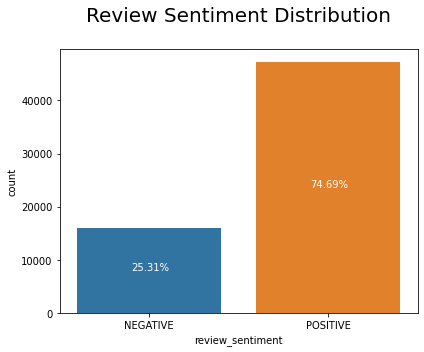

In [ ]:
#countplot distribution of review types
plt.figure(figsize=(6,5))
plt.title('Review Sentiment Distribution\n',size=20)
a=sns.countplot(data=df, x=df.review_sentiment)

for p in a.patches:
  percentage='{:.2f}%'.format(100*p.get_height()/len(df),'.2f')
  x=p.get_x()+p.get_width()-0.5
  y=p.get_y()+p.get_height()/2
  a.annotate(percentage,(x,y),size=10,color='white')
plt.tight_layout()
plt.show()

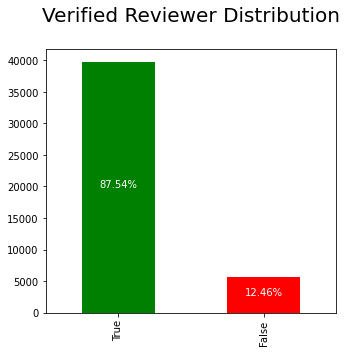

In [ ]:
#number of verified reviews
plt.figure(figsize=(5,5))
plt.title('Verified Reviewer Distribution\n',size=20)
ax=(df.verified.value_counts()).plot.bar(color=['Green','Red'])
for p in ax.patches:
  percentage='{:.2f}%'.format(100*p.get_height()/len(df.verified),'.2f')
  x=p.get_x()+p.get_width()-0.38
  y=p.get_y()+p.get_height()/2
  ax.annotate(percentage,(x,y),size=10,color='white')
plt.tight_layout()
plt.show()

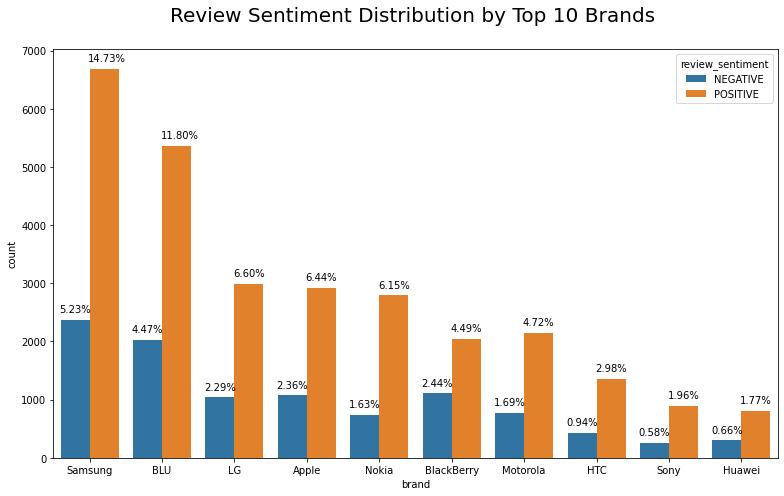

In [ ]:
#countplot of the top 10 brands and their sentiment distribution
plt.figure(figsize=(11,7))
plt.title('Review Sentiment Distribution by Top 10 Brands \n',size=20)
b=sns.countplot(x=df.brand,hue=df.review_sentiment,order=df.brand.value_counts().index[:10])
for p in b.patches:
  percentage='{:.2f}%'.format(100*p.get_height()/len(df),'.2f')
  x=p.get_x()+p.get_width()-0.42
  y=p.get_y()+p.get_height()+130
  b.annotate(percentage,(x,y),size=10)
plt.tight_layout()
plt.show()

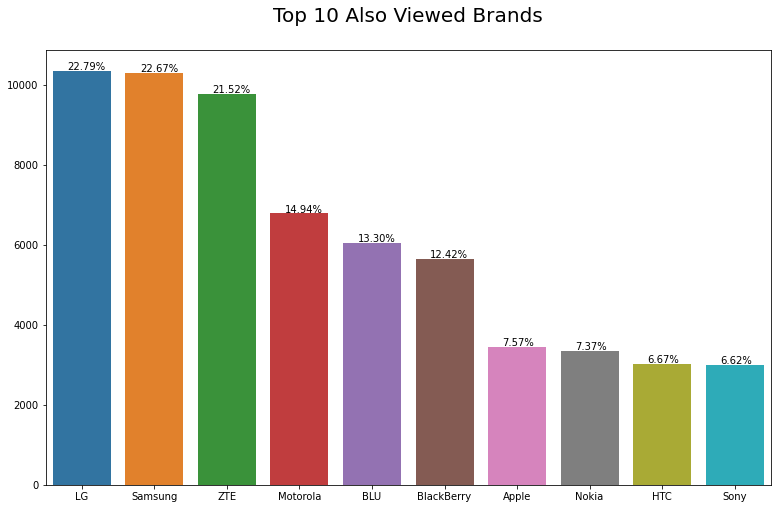

In [ ]:
a=pd.Series([x for item in df.viewed_brands for x in item]).value_counts()
plt.figure(figsize=[13,8])
plt.title("Top 10 Also Viewed Brands\n",size=20)
ax=sns.barplot(x=a.index[1:11],y=a.values[1:11])
for p in ax.patches:
  percentage='{:.2f}%'.format(100*p.get_height()/len(df.verified),'.2f')
  x=p.get_x()+p.get_width()-0.6
  y=p.get_y()+p.get_height()+25
  ax.annotate(percentage,(x,y),size=10,color='black')


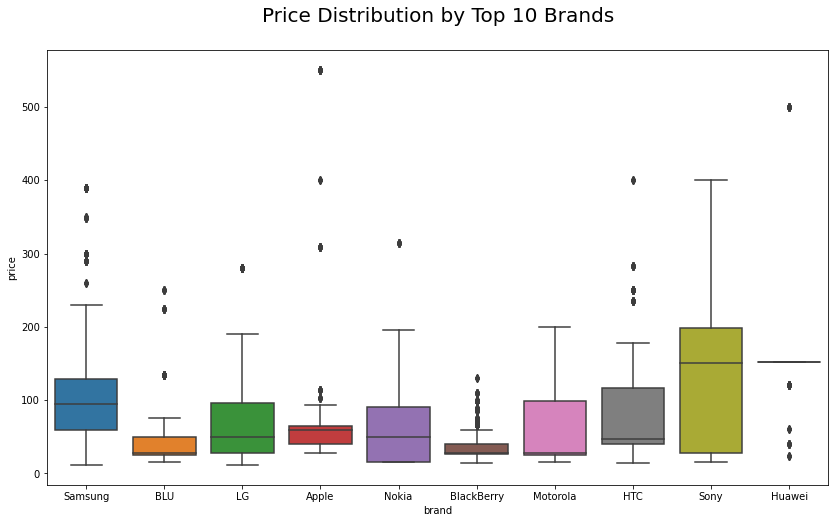

In [ ]:
#price distribution box plot of the top 10 brands
plt.figure(figsize=[14,8])
plt.title("Price Distribution by Top 10 Brands\n",size=20)
sns.boxplot(data=df,x="brand",y="price",order=df["brand"].value_counts().iloc[:10].index)
plt.show()


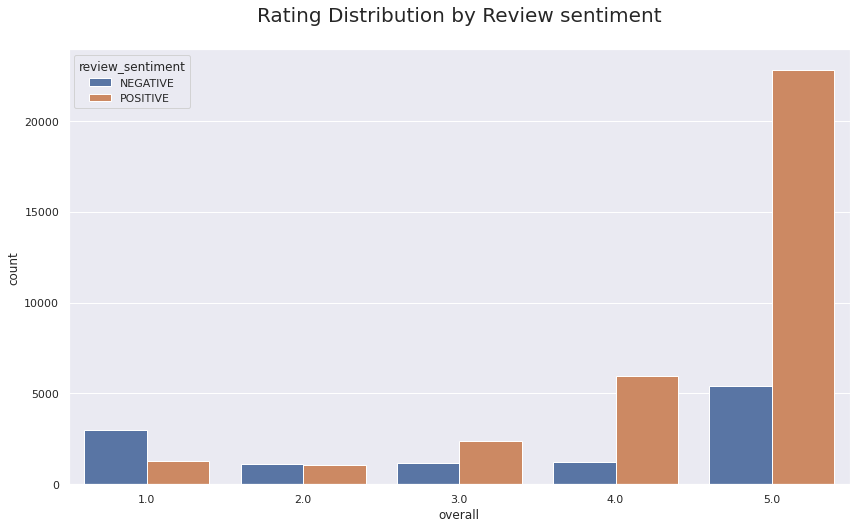

In [ ]:
#countplot of overall rating out of 5 and the review sentiment for each
plt.figure(figsize=[14,8])
plt.title("Rating Distribution by Review sentiment\n",size=20)
sns.countplot(x=df.overall,hue=df.review_sentiment)
plt.show()

In [1]:
#distplot of price vs review sentiment

sns.displot(
    df, x='price', hue='review_sentiment',
    bins=50, linewidth=0, kde=True,
    stat="density", common_norm=False,
    height=6, aspect=2)
plt.title("Price Distribution by Review sentiment\n",size=20)
plt.show()

NameError: ignored

In [ ]:
#drop columns we will not be using longer
df.drop(columns=['similar_item','price',],inplace=True)

In [ ]:
df.isnull().sum()

Unnamed: 0           0
overall              0
verified             0
reviewerID           0
asin                 0
reviewText           0
summary              0
review_sentiment     0
Date&Time            0
description          0
title                0
brand               56
feature              0
rank                 0
details              0
also_viewed          0
also_view_brand      0
viewed_brands        0
dtype: int64

In [ ]:
#drop null rows from brand column
df.dropna(subset=['brand'],inplace=True)

In [ ]:
#saving df again
#df.to_csv("/content/drive/MyDrive/Capstone Project/almost_df.csv")

##Text Analytics

In [ ]:
#reading df
#df=pd.read_csv("/content/drive/MyDrive/Capstone Project/almost_df.csv")

In [ ]:
#number of rows and columns
df.shape

(45354, 18)

In [ ]:
#drop unnamed column
df.drop(columns=['Unnamed: 0'],inplace=True)

In [ ]:
#install necessary libraries
!pip install contractions
!pip install autocorrect

     |████████████████████████████████| 106 kB 5.7 MB/s 
     |████████████████████████████████| 284 kB 35.8 MB/s 
     |████████████████████████████████| 622 kB 5.2 MB/s 
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622382 sha256=dfd8ad0fc7cf5747d5822f73ef436a96c204122cdafb53eb57f2aff4c85485be
  Stored in directory: /root/.cache/pip/wheels/54/d4/37/8244101ad50b0f7d9bffd93ce58ed7991ee1753b290923934b
Successfully built autocorrect


In [ ]:
#install necessary libraries
!pip install wordninja


     |████████████████████████████████| 541 kB 5.5 MB/s 
  Created wheel for wordninja: filename=wordninja-2.0.0-py3-none-any.whl size=541551 sha256=47c1a0bb1c38e4e68ea96fc644ede0551976d1cf8365fcd682bb13dab31d6666
  Stored in directory: /root/.cache/pip/wheels/dd/3f/eb/a2692e3d2b9deb1487b09ba4967dd6920bd5032bfd9ff7acfc
Successfully built wordninja


In [ ]:
#import required libraries
import re
import string
import nltk
import os
import wordninja as wn
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
from bs4 import BeautifulSoup
import contractions
from nltk import FreqDist
from nltk.corpus import stopwords
from autocorrect import Speller
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize,RegexpTokenizer
from nltk.stem import PorterStemmer, WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#convert reviewtext column to string
df.reviewText=df.reviewText.astype('str')

In [ ]:
#functions to remove html http characters from string

def html_remove(input):
  a=BeautifulSoup(input,'html.parser')
  return a.get_text()

def url_remove(input):
  return re.sub(r'http\S+','',input)

def web_remove(input):
  text=html_remove(input)
  text=url_remove(text)
  return text

In [ ]:
#applying web remove function on reviewtext column
df["reviewText"] = df["reviewText"].apply(web_remove)

In [ ]:
#function to remove digits from string
def remove_digits(words):
    words = re.sub(r'\d+', '',words)
    return words

In [ ]:
#applying remvove digits function on review Text column
df['reviewText'] = df['reviewText'].apply(remove_digits)

In [ ]:
#function to remove brackets,punctuations,white space from string
def remove_brackets(input):
  return re.sub('\(.*?\)','',input)

def remove_punc(input):
  final = str.maketrans('','', string.punctuation)
  return input.translate(final)

def white_space(input):
  return ' '.join(input.split())

def clean_extra(input):
  text=remove_brackets(input)
  text=remove_punc(text)
  text=white_space(text)
  return text

In [ ]:
#applying clean extra function on reviewtext column
df["reviewText"] = df["reviewText"].apply(clean_extra)

In [ ]:
#function to remove emojis from string
def deEmoji(input):
  return input.encode('ascii','ignore').decode('ascii')

In [ ]:
#apply deEmoji function on reviewtext column  
df["reviewText"] = df["reviewText"].apply(lambda x: deEmoji(x))

In [ ]:
#apply wordninja split function to split joined words
df["review_text_cleaned"]=[' '.join(wn.split(x)) for x in df["reviewText"]]

In [ ]:
#calling speller function
spell=Speller(lang='en')

In [ ]:
#applying spellcheck on string in reviewtext column
df["review_text_cleaned"]=[spell(str(x)) for x in df["review_text_cleaned"]]

In [ ]:
#function to fix contractions
def fix_contractions(input):
  return contractions.fix(input)

In [ ]:
#applying fix contractions function on reviewtext column
df["reviewText"] = df["reviewText"].apply(fix_contractions)

In [ ]:
# Reading stop words from a text file in to a list
stop_words = [line.rstrip('\n') for line in open('/content/drive/MyDrive/Web and social media analytics/stop_words_long.txt')]

In [ ]:
#reading positive words text file
pos_words = [line.rstrip('\n') for line in open('/content/drive/MyDrive/Web and social media analytics/pos_words.txt')]
#reading negative words text file
neg_words = [line.rstrip('\n') for line in open('/content/drive/MyDrive/Web and social media analytics/neg_words.txt')]

In [ ]:
#remove positive and negative words
def remove_words(document):

  words=document.split(' ')
  
  words =[word for word in words if word not in pos_words]

  words =[word for word in words if word not in neg_words]

  document=' '.join(words)

  return document

In [ ]:
#remove function on reviewtext column
df["review_text_cleaned"]=[remove_words(x) for x in df["reviewText"]]

In [ ]:
#function to text preprocess string
def preprocess(document):
  
  document=document.lower()

  words=word_tokenize(document)
      
  words =[word for word in words if word not in stop_words]

  words=[word for word in words if len(word)>=2]

  document=' '.join(words)

  return document

In [ ]:
#preprocess function applied on review text column
df["review_text_cleaned"]=[preprocess(x) for x in df["review_text_cleaned"]]

In [ ]:
#calling lemmatize function
lemmatizer=WordNetLemmatizer()

In [ ]:
#function to remove stop words and lemmatize string
def lemmatize(document):
  
  document=document.lower()

  words=word_tokenize(document)

  words=[word for word in words if len(word)>=2]

  words=[word for word in words if words not in stopwords.words('english')]

  words =[lemmatizer.lemmatize(word,pos='v') for word in words]

  document=' '.join(words)

  return document

In [ ]:
#applying lemmatize function on review text column  
df["review_text_cleaned"]=[lemmatize(x) for x in df["review_text_cleaned"]]

In [ ]:
#function to tokenize document
def token(document):
  token=word_tokenize(document)
  return token 

In [ ]:
#apply token function on review text cleaned
df['token']=df['review_text_cleaned'].apply(token)

In [ ]:
#save file
df.to_csv("/content/drive/MyDrive/Capstone Project/final_df.csv")

In [ ]:
#check number of null values
df.isnull().sum()

overall                0
verified               0
reviewerID             0
asin                   0
reviewText             0
summary                0
review_sentiment       0
Date&Time              0
description            0
title                  0
brand                  0
feature                0
rank                   0
details                0
also_viewed            0
also_view_brand        0
viewed_brands          0
review_text_cleaned    0
token                  0
dtype: int64

In [ ]:
#drop also view brand column
df.drop(columns=['also_view_brand'],inplace=True)

In [ ]:
#save for tableau
#df.to_csv("/content/drive/MyDrive/Capstone Project/final_df.csv")

In [ ]:
#create new df for positive and negative review sentiment with reviewtext column
df_pos=df[df.review_sentiment=="POSITIVE"][['review_sentiment','review_text_cleaned']]
df_neg=df[df.review_sentiment=="NEGATIVE"][['review_sentiment','review_text_cleaned']]

In [ ]:
#create list of positive features from review text cleaned column
positive_features=list([x for y  in df_pos['review_text_cleaned'].str.strip('[]').str.split(' ').replace('',np.nan) for x in y])
positive_features

['samsung',
 'decide',
 'try',
 'fyi',
 'people',
 'battery',
 'batteries',
 'completely',
 'charge',
 'build',
 'battery',
 'life',
 'do',
 'time',
 'battery',
 'life',
 'immensely',
 'tmobile',
 'customer',
 'stay',
 'customer',
 'service',
 'great',
 'rate',
 'plan',
 'additional',
 'feature',
 'little',
 'gadget',
 'caller',
 'id',
 'pics',
 'able',
 'external',
 'display',
 'flip',
 'persons',
 'camera',
 'flash',
 'zoom',
 'able',
 'picture',
 'gray',
 'sepia',
 'sketch',
 'multishot',
 'lot',
 'frame',
 'picture',
 'download',
 'game',
 'whereas',
 'furthermore',
 'game',
 'actually',
 'java',
 'flash',
 'serve',
 'flashlight',
 'sometimes',
 'walk',
 'light',
 'voice',
 'memo',
 'nuf',
 'otherwise',
 'usual',
 'feature',
 'calculator',
 'calendar',
 'list',
 'mms',
 'sms',
 'download',
 'ringtones',
 'game',
 'picture',
 'pretty',
 'usual',
 'stuff',
 'phone',
 'except',
 'bluetooth',
 'external',
 'display',
 'bluegreen',
 'black',
 'background',
 'press',
 'button',
 'time',


In [ ]:
#create list of negative features from review text cleaned column
negative_features=list([x for y  in df_neg['review_text_cleaned'].str.strip('[]').str.split(' ').replace('',np.nan) for x in y])
negative_features

['phone',
 'heavy',
 'user',
 'interface',
 'techies',
 'drop',
 'call',
 'manhattan',
 'moto',
 'phone',
 'take',
 'picture',
 'reception',
 'moto',
 'tmobile',
 'stay',
 'samsung',
 'phone',
 'measureup',
 'be',
 'tmobile',
 'customer',
 'finally',
 'feed',
 'vs',
 'camera',
 'tmobile',
 'send',
 'upgrade',
 'feature',
 'phone',
 'external',
 'antenna',
 'brake',
 'camera',
 'take',
 'picture',
 'phone',
 'sound',
 'quality',
 'call',
 'receiver',
 'tinny',
 'sound',
 'digital',
 'feature',
 'lastly',
 'simply',
 'phone',
 'word',
 'feature',
 'pack',
 'practically',
 'design',
 'modern',
 'cell',
 'phone',
 'opinion',
 'art',
 'look',
 'accomodate',
 'user',
 'practical',
 'feature',
 'phone',
 'short',
 'debate',
 'phone',
 'upgrade',
 'phone',
 'except',
 'camera',
 'chicago',
 'gps',
 'surround',
 'suburbs',
 'miles',
 'north',
 'chicago',
 'telenav',
 'company',
 'sell',
 'gps',
 'map',
 'service',
 'nextel',
 'phone',
 'charge',
 'kilobyte',
 'come',
 'twentybucks',
 'month',
 

In [ ]:
#df of positive and negative words list
df_pos=pd.DataFrame({'col':positive_features})
df_neg=pd.DataFrame({'col':negative_features})

In [ ]:
#most common words in df_pos
df_pos.value_counts()

col        
phone          70362
screen         11896
battery         9463
be              9023
buy             7999
               ...  
iphonewhy          1
iphonevery         1
iphoneusers        1
iphonetouch        1
zzother            1
Length: 28243, dtype: int64

In [ ]:
#most common words in df_neg
df_neg.value_counts()

col           
phone             11369
buy                1949
excelente          1583
battery            1502
screen             1455
                  ...  
nifty                 1
dailystealscom        1
dais                  1
nicw                  1
zzzthis               1
Length: 10738, dtype: int64

In [ ]:
#saved for tableau wordcloud
#df_pos.to_csv("/content/drive/MyDrive/Capstone Project/df_pos.csv")
#df_neg.to_csv("/content/drive/MyDrive/Capstone Project/df_neg.csv")

In [ ]:
#import itertools and call regexptokenizer
Tokenizer=RegexpTokenizer(r'\w+')
import itertools

#create a list of words from token column
wordlist=[]
wordlist=[Tokenizer.tokenize(str(x)) for x in df['token']]
wordlist=list(itertools.chain(*wordlist))

In [ ]:
#function to create bag of words from wordlist
from nltk import FreqDist
def Bag_Of_Words(wordlist):
    all_words = []
    for m in wordlist:
            all_words.append(m.lower())
    all_words = FreqDist(all_words)
    return all_words

Total number of Words
 32095


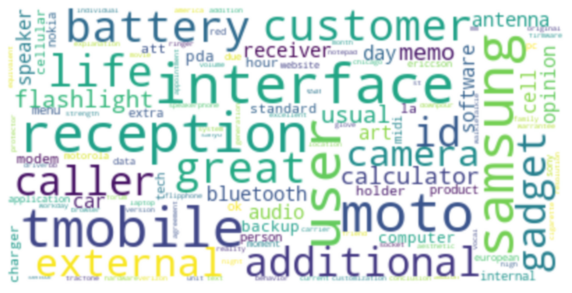

In [ ]:
#create wordcloud with bag of words
from wordcloud import WordCloud
all_words = Bag_Of_Words(wordlist)
ax = plt.figure(figsize=(10,10))
# create word cloud from all words keys 
wordcloud = WordCloud(background_color='white',max_font_size=40).generate(' '.join(all_words.keys()))

#plot wordcloud in bilinear
plt.imshow(wordcloud, interpolation='bicubic')
plt.axis("off")
print("Total number of Words\n",len(all_words))

Positive words 



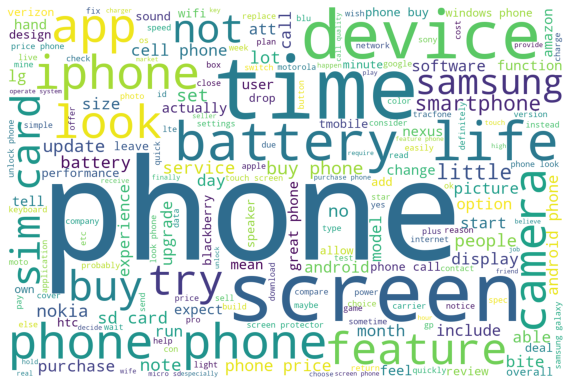

Negative words 



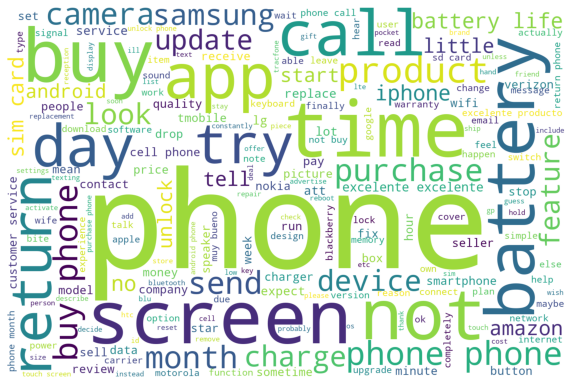

In [ ]:
#function to creat wordcloud
def word_cloud(Cleandata, color = 'black'):
    words = ' '.join(Cleandata)
    cleaned_word = " ".join([word for word in words.split()])
    wordcloud = WordCloud(stopwords=stop_words,
                      background_color=color,
                      width=1500,
                      height=1000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(10,10))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

#positive word cloud
print("Positive words \n")
word_cloud(df_pos.col,'white')
#negative word cloud
print("Negative words \n")
word_cloud(df_neg.col,'white')

##Model Building

In [ ]:
#calling df
#df=pd.read_csv("/content/drive/MyDrive/Capstone Project/model_df.csv")

In [ ]:
#first five columns of df
df.head()

,overall,verified,reviewerID,asin,reviewText,summary,review_sentiment,Date&Time,description,title,brand,feature,rank,details,also_viewed,viewed_brands,review_text_cleaned,token
0,1.0,False,A5JLAU2ARJ0BO,B0000E3GWH,This phone is ugly and heavy and has a terribl...,Bad reception,NEGATIVE,2004-09-20,"[""Compatible with T-Mobile cellular service, S...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,Samsung,[],"['>#3,059,436 in Cell Phones & Accessories (Se...",{},[],[],phone heavy user interface techies drop call m...,"[phone, heavy, user, interface, techies, drop,..."
1,4.0,False,A1ACM1CBGORBN1,B0000E3GWH,I had the Samsung V and then I decided to try ...,Pretty good phone.. an improvement from my v205,POSITIVE,2004-07-23,"[""Compatible with T-Mobile cellular service, S...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,Samsung,[],"['>#3,059,436 in Cell Phones & Accessories (Se...",{},[],[],samsung decide try fyi people battery batterie...,"[samsung, decide, try, fyi, people, battery, b..."
2,3.0,False,A2V48Q03FZUOSD,B0000E3GWH,This is the first Samsung phone I have had and...,Not as user friendly as the Motorola V300-,NEGATIVE,2004-07-05,"[""Compatible with T-Mobile cellular service, S...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,Samsung,[],"['>#3,059,436 in Cell Phones & Accessories (Se...",{},[],[],samsung phone measureup be tmobile customer fi...,"[samsung, phone, measureup, be, tmobile, custo..."
3,5.0,True,A1V3TRGWOMA8LC,B0000E3GWH,and I Am from Europe where the phones and netw...,The best phone I've ever owned,POSITIVE,2004-04-11,"[""Compatible with T-Mobile cellular service, S...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,Samsung,[],"['>#3,059,436 in Cell Phones & Accessories (Se...",{},[],[],be europe phone network samsung currently soft...,"[be, europe, phone, network, samsung, currentl..."
4,3.0,False,A3NOBH42C7UI5M,B0000E3GWH,This phone is amazingly small and light for a ...,I love the phone but it has some real problems,POSITIVE,2004-02-18,"[""Compatible with T-Mobile cellular service, S...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,Samsung,[],"['>#3,059,436 in Cell Phones & Accessories (Se...",{},[],[],phone light camera phone flashlightflash probl...,"[phone, light, camera, phone, flashlightflash,..."


In [ ]:
#total number of positive and negative review sentiments
df.review_sentiment.value_counts()

POSITIVE    33445
NEGATIVE    11909
Name: review_sentiment, dtype: int64

In [ ]:
#import required libaries and features for model building and evaluation
from sklearn import model_selection, preprocessing, metrics, linear_model
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import make_pipeline

In [ ]:
#separate df into train and test df (80-20 split)
mask=np.random.rand(len(df))<0.8
train_df=df[mask]
test_df=df[~mask]

Here, we are splitting the train df into valid x and train x, to build and test the model on these columns before testing on test df.


In [ ]:
# train test split and label encoding review sentiment column
X_train,valid_x,y_train,valid_y=model_selection.train_test_split(train_df['review_text_cleaned'],train_df['review_sentiment'])
encoder=preprocessing.LabelEncoder()
y_train=encoder.fit_transform(y_train)
valid_y=encoder.fit_transform(valid_y)

In [ ]:
#build model to generate accuracy score based on classifier and data entered
def model(classifier,feature_vector_train,label,feature_vector_valid):
  
  classifier.fit(feature_vector_train,label)
  
  prediction=classifier.predict(feature_vector_valid)
  
  return metrics.accuracy_score(valid_y,prediction)

In [ ]:
#calling countvectorizer function and fitting and transforming train df
vect=CountVectorizer()
vect.fit(train_df['review_text_cleaned'])
X_train_vect=vect.transform(X_train)
valid_x_vect=vect.transform(valid_x)

In [ ]:
#calling tfidfvectorizer function and fitting and transforming train df
tfidf_vect=TfidfVectorizer()
tfidf_vect.fit(train_df['review_text_cleaned'])
X_train_tfidf=tfidf_vect.transform(X_train)
valid_x_tfidf=tfidf_vect.transform(valid_x)

In [ ]:
#model accuracy for Logistic Regression - CountVectorizer
accuracy1 =model(linear_model.LogisticRegression(random_state=1,multi_class='multinomial'),X_train_vect,y_train, valid_x_vect)
print("Logistic Regression, CountVectorizer model:",accuracy1)

Logistic Regression, CountVectorizer model: 0.8215658284835841


In [ ]:
#model accuracy for Logistic Regression - TFIDF vectorizer

accuracy2 =model(linear_model.LogisticRegression(random_state=1,multi_class='multinomial'),X_train_tfidf,y_train, valid_x_tfidf)
print("Logistic Regression, TFIDF model:",accuracy2)

Logistic Regression, TFIDF model: 0.8340836719007357


In [ ]:
#model accuracy for Logistic Regression - CountVectorizer with random oversalmpling

ros = RandomOverSampler(random_state=0)

ros_X_train_vect, ros_y_train = ros.fit_resample(X_train_vect, y_train)

accuracy3 = model(linear_model.LogisticRegression(random_state=1,multi_class='multinomial'),ros_X_train_vect, ros_y_train, valid_x_vect)
print ("Logistic Regression - CountVectorizer model (Oversampling):", accuracy3)

Logistic Regression - CountVectorizer model (Oversampling): 0.746239156692654


In [ ]:
#model accuracy for Logistic Regression - Tfidf Vectorizer with random oversalmpling

ros = RandomOverSampler(random_state=0)

ros_Xtrain_tfidf, ros_y_train = ros.fit_resample(X_train_tfidf, y_train)

accuracy4 = model(linear_model.LogisticRegression(random_state=1,multi_class='multinomial'),ros_Xtrain_tfidf, ros_y_train, valid_x_tfidf)
print ("Logistic Regression - TFIDF model (Oversampling):", accuracy4)

Logistic Regression - TFIDF model (Oversampling): 0.7645766992423411


In [ ]:
#model accuracy for Multinomial Naive Bayes - CountVectorizer

accuracy5 =model(MultinomialNB(),X_train_vect,y_train, valid_x_vect)
print("Mulitnomial Naive Bayes - CountVectorizer model:",accuracy5)

Mulitnomial Naive Bayes - CountVectorizer model: 0.8166245745031294


In [ ]:
#model accuracy for Multinomial Naive Bayes - Tfidf Vectorizer

accuracy6 =model(MultinomialNB(),X_train_tfidf,y_train, valid_x_tfidf)
print("Mulitnomial Naive Bayes - TFIDF model:",accuracy6)

Mulitnomial Naive Bayes - TFIDF model: 0.8113539035906445


In [ ]:
#model accuracy for Multinomial Naive Bayes with CountVectorizer with random oversampling

ros = RandomOverSampler(random_state=0)

ros_X_train_vect, ros_y_train = ros.fit_resample(X_train_vect, y_train)

accuracy7 = model(MultinomialNB(),ros_X_train_vect, ros_y_train, valid_x_vect)
print ("Mulitnomial Naive Bayes - CountVectorizer model (OverSampling)", accuracy7)

Mulitnomial Naive Bayes - CountVectorizer model (OverSampling) 0.7348193697156034


In [ ]:
#model accuracy for Multinomial Naive Bayes with Tfidf Vectorizer with random oversampling

ros = RandomOverSampler(random_state=0)

ros_Xtrain_tfidf, ros_y_train = ros.fit_resample(X_train_tfidf, y_train)

accuracy8 = model(MultinomialNB(),ros_Xtrain_tfidf, ros_y_train, valid_x_tfidf)
print ("Mulitnomial Naive Bayes - TFIDF model (Oversampling):", accuracy8)

Mulitnomial Naive Bayes - TFIDF model (Oversampling): 0.7806083232678159


From the above models, we can identify the performance of Logisitic Regression - TFIDF model having the highest accuracy. 
We will now evaluate the same on the test df.

##Model Evaluation

In [ ]:
#train test split with df, encoding y train and y test 
X_train,X_test,y_train,y_test=model_selection.train_test_split(df['review_text_cleaned'],df['review_sentiment'])
encoder=preprocessing.LabelEncoder()
y_train=encoder.fit_transform(y_train)
y_test=encoder.fit_transform(y_test)

In [ ]:
#calling tfidf vectorizer and fit transform train and test data 
tfidf_vect=TfidfVectorizer()
tfidf_vect.fit(test_df['review_text_cleaned'])
X_train_tfidf=tfidf_vect.transform(X_train)
X_test_tfidf=tfidf_vect.transform(X_test)

In [ ]:
#calling Logistic Regression function, fitting on train data and predicting on test data
lr=linear_model.LogisticRegression(random_state=1,multi_class='multinomial')

lr.fit(X_train_tfidf,y_train)

y_pred_class=lr.predict(X_test_tfidf)

y_pred_proba=lr.predict_proba(X_test_tfidf)


In [ ]:
#predicting on train data
y_pred_train=lr.predict(X_train_tfidf)

#import and test accuracy score for train data
from sklearn import metrics
metrics.accuracy_score(y_train,y_pred_train)

0.8653535205056593

In [ ]:
#test accuracy score test data
metrics.accuracy_score(y_test,y_pred_class)

0.8332304436017286

In [ ]:
#import and get confusion matrix for test data
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_class)

array([[1502, 1527],
       [ 364, 7946]])

In [ ]:
#confusion matrix get sensitivity specificity precision and recall of test data 
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print("Confusion Matrix: \n", confusion)
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

#print sensitivity
sensitivity = TP / float(FN + TP)
print("Sensitivity: ",sensitivity)

#print specificity
specificity = TN / float(TN+FP)
print("Specificity: ",specificity)

Confusion Matrix: 
 [[1502 1527]
 [ 364 7946]]
Sensitivity:  0.9561973525872443
Specificity:  0.4958732254869594


In [ ]:
#print precision, recall and f1 score of test data

print("Precision :",metrics.precision_score(y_test, y_pred_class))
print("Recall :", metrics.recall_score(y_test, y_pred_class))
print("F1 Score :",metrics.f1_score(y_test, y_pred_class))

Precision : 0.8388050248073472
Recall : 0.9561973525872443
F1 Score : 0.8936624866445482


In [ ]:
#import roc curve and get FPR,TPR for test data
from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)


In [ ]:
#print roc_auc
print(roc_auc)

0.8734610160347288


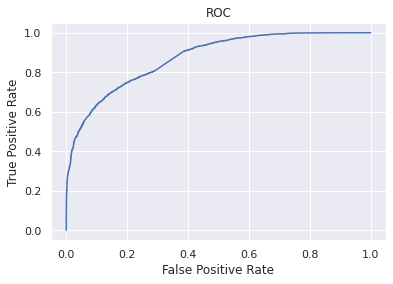

In [ ]:
#plot roc curve
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)


In [ ]:
#saving file
#df=pd.read_csv("/content/drive/MyDrive/Capstone Project/final.csv")

FileNotFoundError: ignored